# STEP #1: IMPORTING DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


import pandas as pd

# Correct file paths after mounting
chicago_df_1 = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip', nrows=50)
chicago_df_2 = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip', nrows=50)
chicago_df_3 = pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip', nrows=50)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)


# STEP #2: EXPLORING THE DATASET  

In [ ]:
# Head of the training dataset
chicago_df.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"


In [ ]:
# Last elements in the training dataset
chicago_df.tail(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
48,10252,10509311,HZ250961,05/03/2016 09:00:00 PM,029XX S WALLACE ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,...,11.0,60.0,26,1172771.0,1885463.0,2016,05/10/2016 03:56:50 PM,41.841146,-87.641484,"(41.841145857, -87.641483881)"
49,10295,10509328,HZ250653,05/03/2016 09:30:00 AM,071XX S EAST END AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,8.0,43.0,07,1188770.0,1857957.0,2016,05/10/2016 03:56:50 PM,41.765299,-87.583655,"(41.765298896, -87.583654511)"


<Axes: >

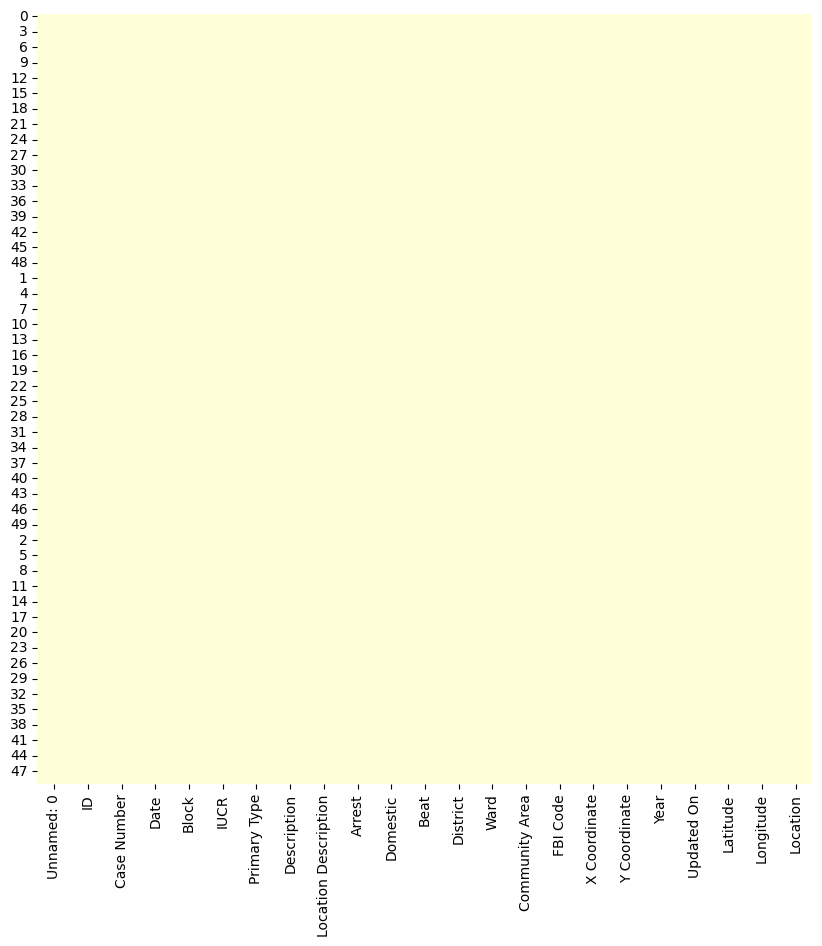

In [ ]:
# Null elements in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [ ]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
45,10509271,05/03/2016 05:30:00 PM,0000X S WABASH AVE,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False
46,10509277,05/03/2016 10:00:00 PM,087XX S BURLEY AVE,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,CHA PARKING LOT/GROUNDS,False,False
47,10509285,05/03/2016 09:00:00 PM,029XX N MOBILE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False
48,10509311,05/03/2016 09:00:00 PM,029XX S WALLACE ST,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True


In [ ]:
# Assembling a datetime by rearranging the dataframe column "Date".

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
45,10509271,2016-05-03 17:30:00,0000X S WABASH AVE,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False
46,10509277,2016-05-03 22:00:00,087XX S BURLEY AVE,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,CHA PARKING LOT/GROUNDS,False,False
47,10509285,2016-05-03 21:00:00,029XX N MOBILE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False
48,10509311,2016-05-03 21:00:00,029XX S WALLACE ST,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True


In [ ]:
# setting the index to be the date
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [ ]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2016-05-03 17:30:00,10509271,2016-05-03 17:30:00,0000X S WABASH AVE,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False
2016-05-03 22:00:00,10509277,2016-05-03 22:00:00,087XX S BURLEY AVE,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,CHA PARKING LOT/GROUNDS,False,False
2016-05-03 21:00:00,10509285,2016-05-03 21:00:00,029XX N MOBILE AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False


In [ ]:
chicago_df['Primary Type'].value_counts()

,count
Primary Type,
HOMICIDE,50
THEFT,25
BATTERY,23
MOTOR VEHICLE THEFT,11
NARCOTICS,9
OTHER OFFENSE,6
CRIMINAL DAMAGE,6
ASSAULT,6
DECEPTIVE PRACTICE,4


In [ ]:
chicago_df['Primary Type'].value_counts().iloc[:15]

,count
Primary Type,
HOMICIDE,50
THEFT,25
BATTERY,23
MOTOR VEHICLE THEFT,11
NARCOTICS,9
OTHER OFFENSE,6
CRIMINAL DAMAGE,6
ASSAULT,6
DECEPTIVE PRACTICE,4


In [ ]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['HOMICIDE', 'THEFT', 'BATTERY', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'ASSAULT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'BURGLARY',
       'PUBLIC PEACE VIOLATION'],
      dtype='object', name='Primary Type')

<Axes: xlabel='count', ylabel='Primary Type'>

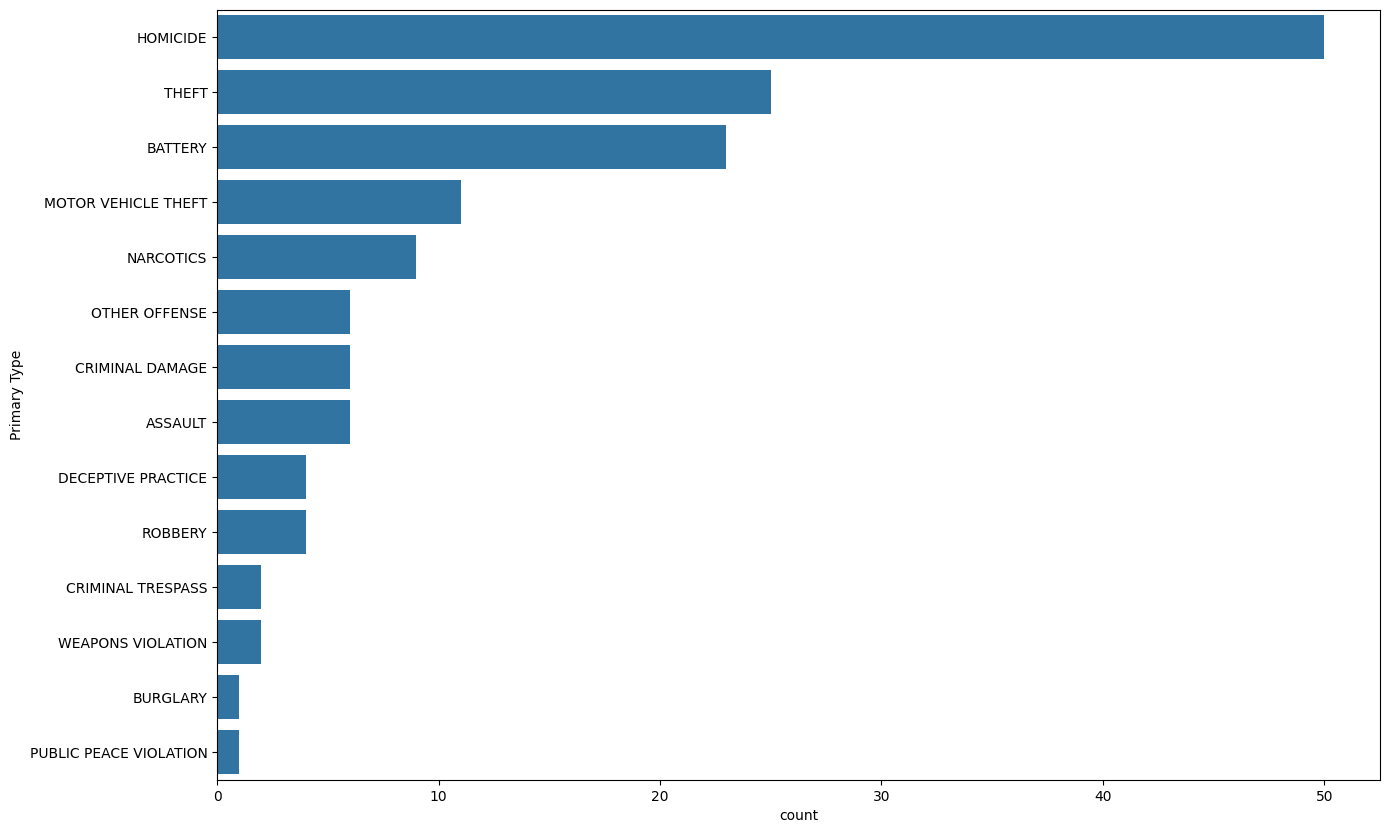

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

<Axes: xlabel='count', ylabel='Location Description'>

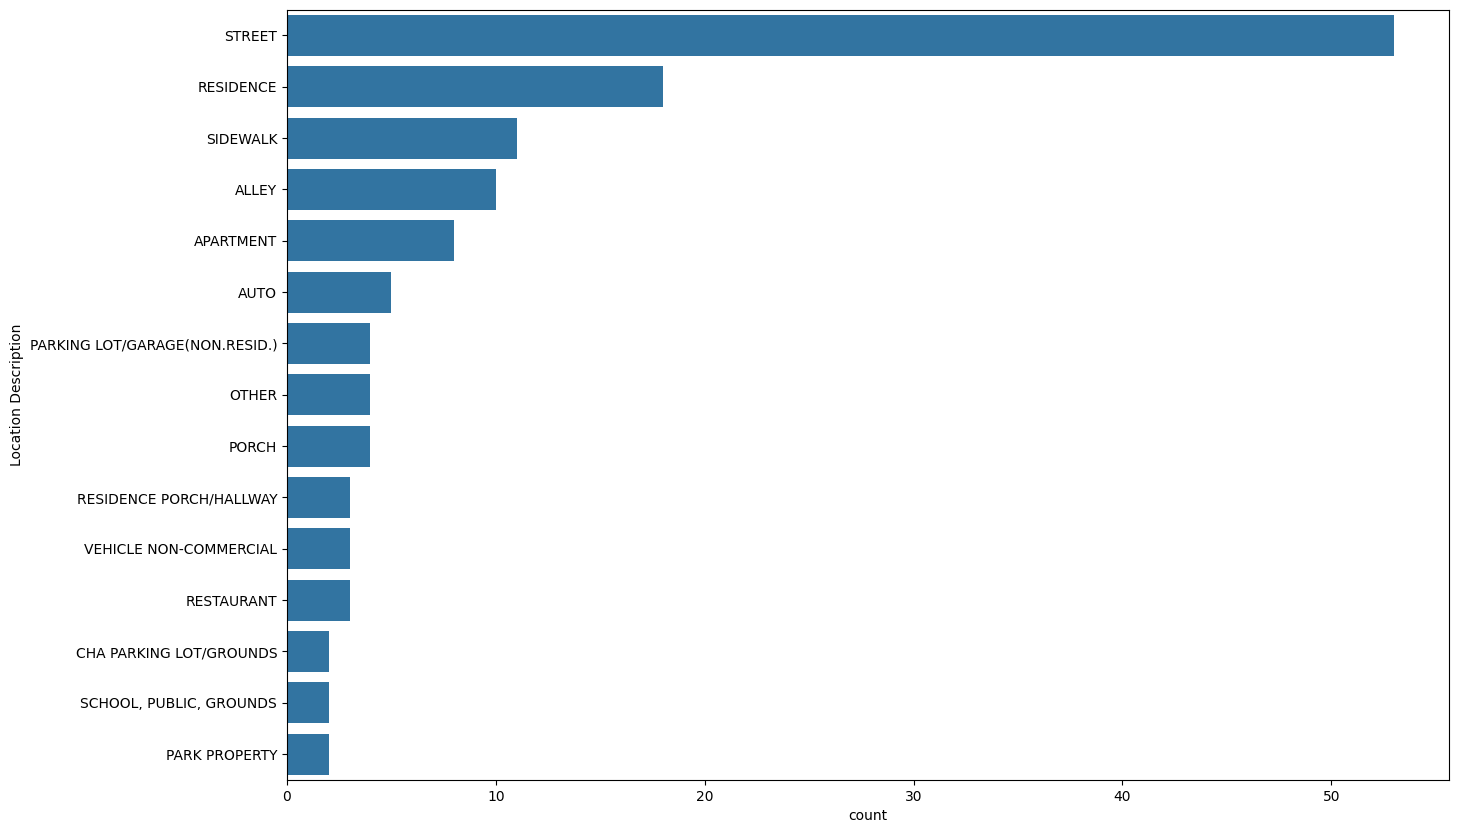

In [ ]:
chicago_df = chicago_df.reset_index(drop=True)

plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [ ]:
chicago_df.set_index('Date', inplace=True)

chicago_df.resample('YE').size()

datetime64[ns]


,0
Date,
2006-12-31,50
2007-12-31,0
2008-12-31,50
2009-12-31,0
2010-12-31,0
2011-12-31,0
2012-12-31,0
2013-12-31,0
2014-12-31,0


/tmp/ipython-input-122-3232192513.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_df.resample('Y').size())


Text(0, 0.5, 'Number of Crimes')

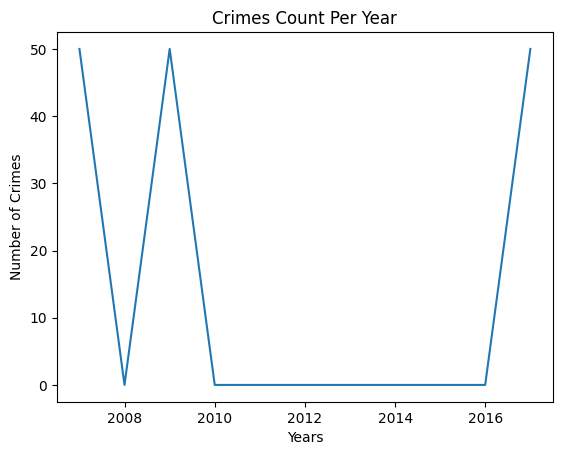

In [ ]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [ ]:
chicago_df.resample('M').size()

/tmp/ipython-input-123-555398310.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_df.resample('M').size()


,0
Date,
2006-01-31,1
2006-02-28,9
2006-03-31,9
2006-04-30,31
2006-05-31,0
...,...
2016-01-31,0
2016-02-29,0
2016-03-31,0


/tmp/ipython-input-124-1951406331.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(chicago_df.resample('M').size())


Text(0, 0.5, 'Number of Crimes')

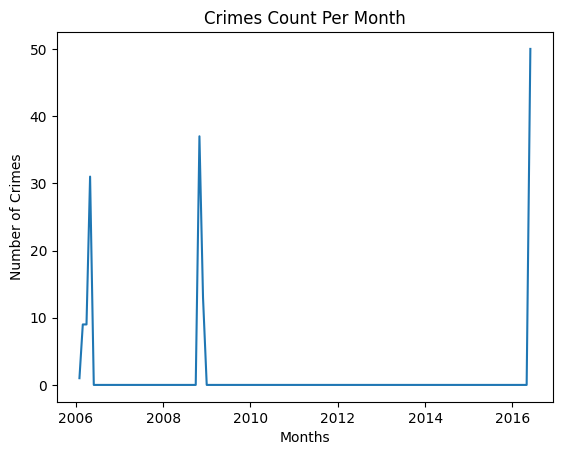

In [ ]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [ ]:
chicago_df.resample('Q').size()

/tmp/ipython-input-125-2252066609.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  chicago_df.resample('Q').size()


,0
Date,
2006-03-31,19
2006-06-30,31
2006-09-30,0
2006-12-31,0
2007-03-31,0
2007-06-30,0
2007-09-30,0
2007-12-31,0
2008-03-31,0


/tmp/ipython-input-126-352377946.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(chicago_df.resample('Q').size())


Text(0, 0.5, 'Number of Crimes')

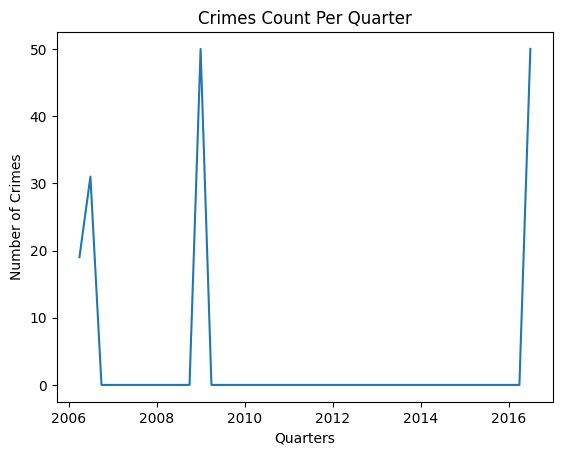

In [ ]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [ ]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

/tmp/ipython-input-127-1392186512.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_prophet = chicago_df.resample('M').size().reset_index()


In [ ]:
chicago_prophet

,Date,0
0,2006-01-31,1
1,2006-02-28,9
2,2006-03-31,9
3,2006-04-30,31
4,2006-05-31,0
...,...,...
120,2016-01-31,0
121,2016-02-29,0
122,2016-03-31,0
123,2016-04-30,0


In [ ]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [ ]:
chicago_prophet

,Date,Crime Count
0,2006-01-31,1
1,2006-02-28,9
2,2006-03-31,9
3,2006-04-30,31
4,2006-05-31,0
...,...,...
120,2016-01-31,0
121,2016-02-29,0
122,2016-03-31,0
123,2016-04-30,0


In [ ]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [ ]:
chicago_prophet_df

,Date,Crime Count
0,2006-01-31,1
1,2006-02-28,9
2,2006-03-31,9
3,2006-04-30,31
4,2006-05-31,0
...,...,...
120,2016-01-31,0
121,2016-02-29,0
122,2016-03-31,0
123,2016-04-30,0


# STEP #4: MAKE PREDICTIONS

In [ ]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [ ]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [ ]:
chicago_prophet_df_final

,ds,y
0,2006-01-31,1
1,2006-02-28,9
2,2006-03-31,9
3,2006-04-30,31
4,2006-05-31,0
...,...,...
120,2016-01-31,0
121,2016-02-29,0
122,2016-03-31,0
123,2016-04-30,0


In [ ]:
m = Prophet()
m.fit(chicago_prophet_df_final)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8_jdihs/e3jwtxp1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8_jdihs/bb439d81.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77778', 'data', 'file=/tmp/tmpf8_jdihs/e3jwtxp1.json', 'init=/tmp/tmpf8_jdihs/bb439d81.json', 'output', 'file=/tmp/tmpf8_jdihs/prophet_modellww9y6b0/prophet_model-20250707204921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:49:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-31,1.325300,-7.294621,8.180244,1.325300,1.325300,-0.929639,-0.929639,-0.929639,-0.929639,-0.929639,-0.929639,0.0,0.0,0.0,0.395661
1,2006-02-28,1.319714,-6.587832,8.687177,1.319714,1.319714,-0.069628,-0.069628,-0.069628,-0.069628,-0.069628,-0.069628,0.0,0.0,0.0,1.250086
2,2006-03-31,1.313530,-6.357386,8.592076,1.313530,1.313530,-0.057331,-0.057331,-0.057331,-0.057331,-0.057331,-0.057331,0.0,0.0,0.0,1.256199
3,2006-04-30,1.307545,-4.197824,10.408758,1.307545,1.307545,2.081116,2.081116,2.081116,2.081116,2.081116,2.081116,0.0,0.0,0.0,3.388661
4,2006-05-31,1.301361,-3.263254,11.768961,1.301361,1.301361,2.924593,2.924593,2.924593,2.924593,2.924593,2.924593,0.0,0.0,0.0,4.225954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2017-05-27,0.500716,-25.453464,-10.928211,0.500714,0.500717,-18.458392,-18.458392,-18.458392,-18.458392,-18.458392,-18.458392,0.0,0.0,0.0,-17.957676
486,2017-05-28,0.500516,-20.064005,-4.848200,0.500515,0.500518,-13.034731,-13.034731,-13.034731,-13.034731,-13.034731,-13.034731,0.0,0.0,0.0,-12.534214
487,2017-05-29,0.500317,-14.151374,0.521273,0.500315,0.500318,-7.351864,-7.351864,-7.351864,-7.351864,-7.351864,-7.351864,0.0,0.0,0.0,-6.851548
488,2017-05-30,0.500117,-8.755451,6.264380,0.500116,0.500119,-1.506172,-1.506172,-1.506172,-1.506172,-1.506172,-1.506172,0.0,0.0,0.0,-1.006055


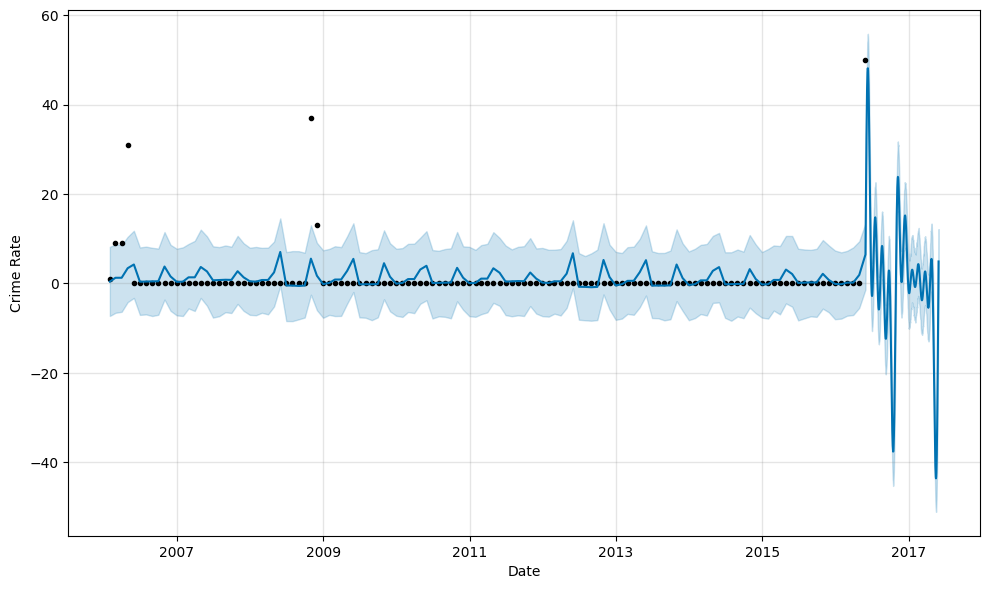

In [ ]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

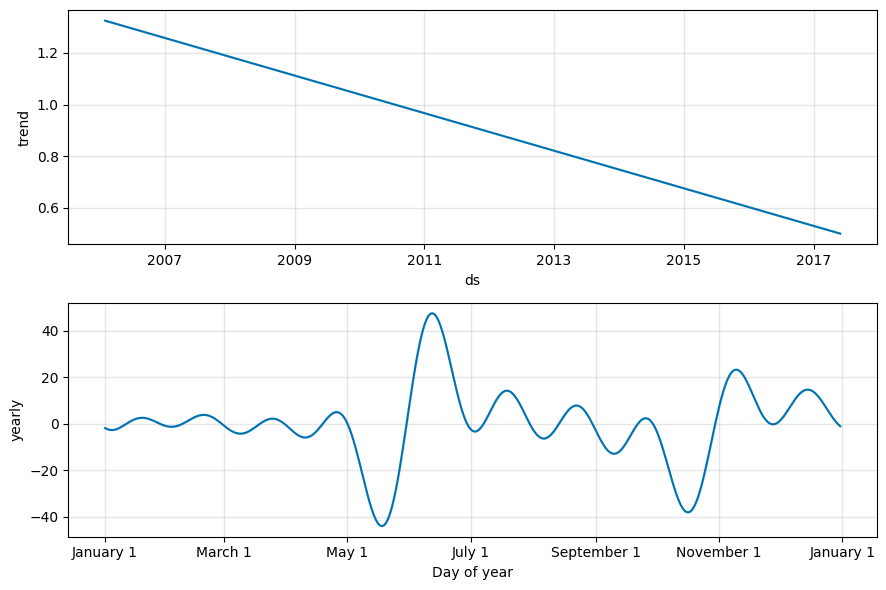

In [ ]:
figure3 = m.plot_components(forecast)